In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import lightkurve as lk
import numpy as np
from astropy import units as u
from lightkurve import search_targetpixelfile
from lightkurve import LightCurve

### Target - Wasp 48b (near Cygnus's right wing)

In [2]:
TIC = 'TIC 284475976' 
star_mass = 1.77061    

In [3]:
available_data_all = lk.search_lightcurve(TIC, author = 'SPOC')
available_data_all

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 23,2020,SPOC,120,284475976,0.0
1,TESS Sector 26,2020,SPOC,120,284475976,0.0
2,TESS Sector 40,2021,SPOC,120,284475976,0.0
3,TESS Sector 41,2021,SPOC,120,284475976,0.0
4,TESS Sector 60,2022,SPOC,20,284475976,0.0
5,TESS Sector 56,2022,SPOC,20,284475976,0.0
6,TESS Sector 60,2022,SPOC,120,284475976,0.0
7,TESS Sector 56,2022,SPOC,120,284475976,0.0
8,TESS Sector 54,2022,SPOC,120,284475976,0.0


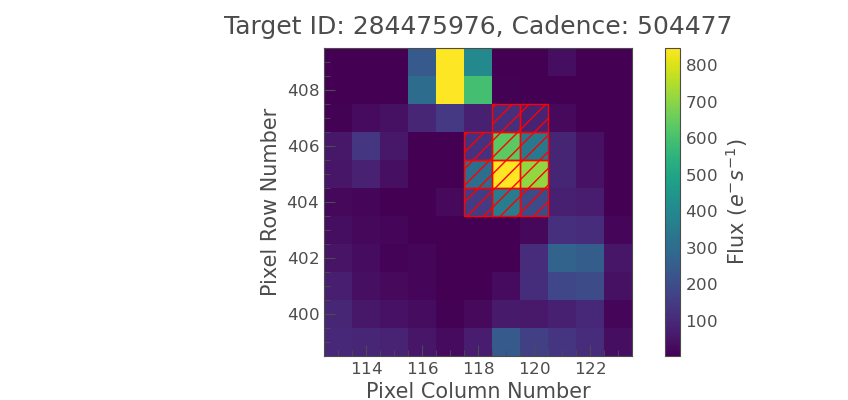

In [4]:
pixelfile = search_targetpixelfile(TIC, author = 'SPOC', sector = 23).download();

pixelfile.plot(aperture_mask = 'pipeline')
plt.show()

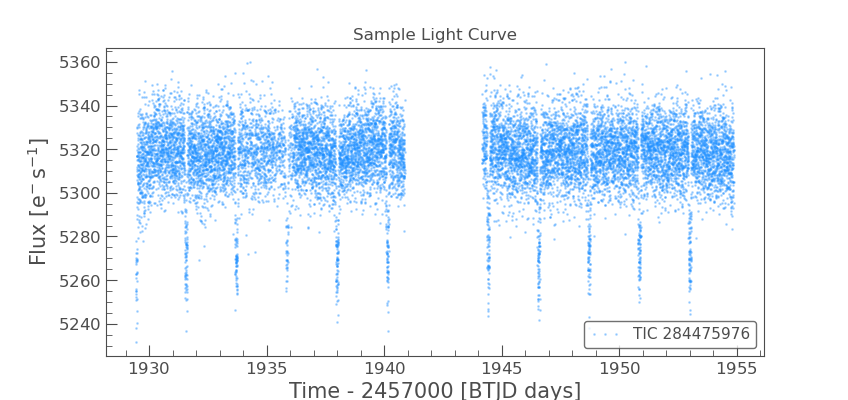

In [5]:
sector_data = lk.search_lightcurve(TIC, author = 'SPOC', sector = 23)
lc = sector_data.download()
lc.normalize().flatten().remove_outliers().remove_nans()

lc.plot(linewidth = 0, marker = '.', color = 'dodgerblue', alpha = .3)
plt.title("Sample Light Curve")
plt.show()

### Light Curve, Orbital Period, & Radius

In [6]:
select_sectors = lk.search_lightcurve(TIC, author = 'SPOC', sector = [80,81,82,83], exptime = 120)
select_sectors

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 80,2024,SPOC,120,284475976,0.0
1,TESS Sector 81,2024,SPOC,120,284475976,0.0
2,TESS Sector 82,2024,SPOC,120,284475976,0.0
3,TESS Sector 83,2024,SPOC,120,284475976,0.0


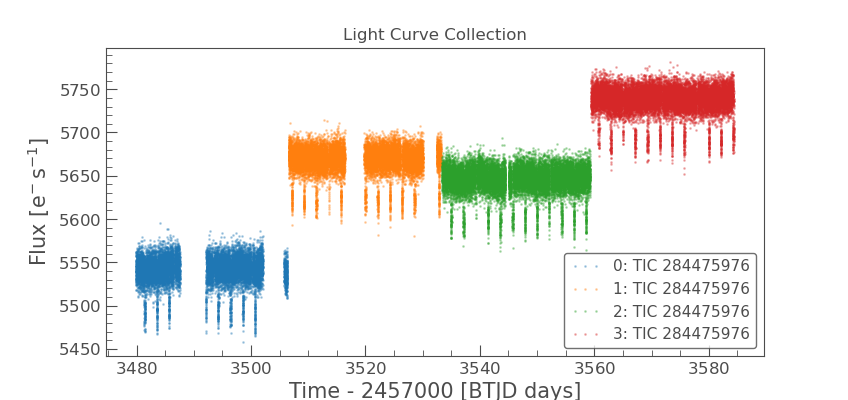

In [7]:
lc_collection = select_sectors.download_all()

lc_collection.plot(linewidth = 0, marker = '.', alpha = .3)
plt.title("Light Curve Collection")
plt.show()

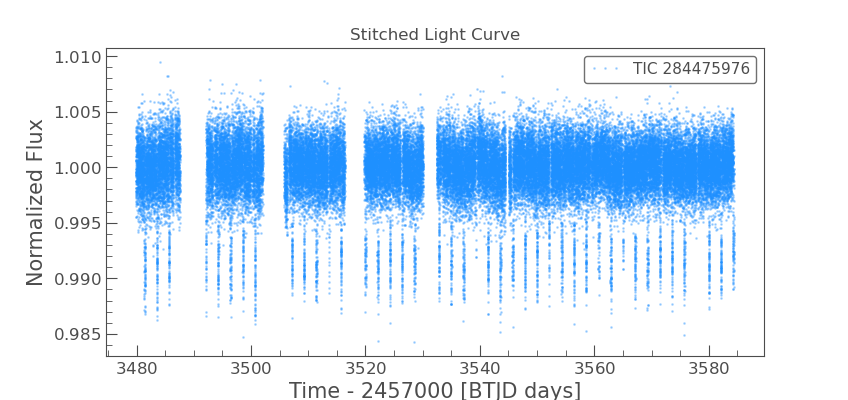

In [8]:
lc_collection_stitched = lc_collection.stitch()
lc_collection_stitched.flatten().remove_outliers().remove_nans()

lc_collection_stitched.plot(linewidth = 0, marker = '.', color = 'dodgerblue', alpha = .3,)
plt.title("Stitched Light Curve")
plt.show()

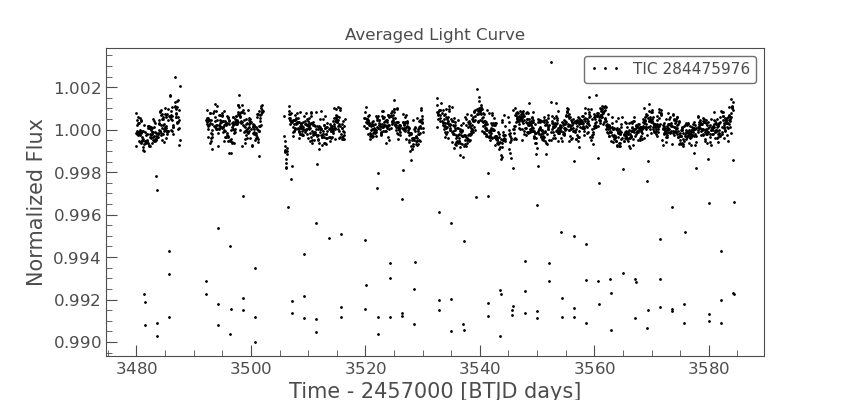

In [9]:
bin_time = 60/60/24
lc_collection_stitched_binned = lc_collection_stitched.bin(bin_time)

lc_collection_stitched_binned.plot(linewidth = 0, marker = '.', color = 'black')
plt.title("Averaged Light Curve")
plt.show()

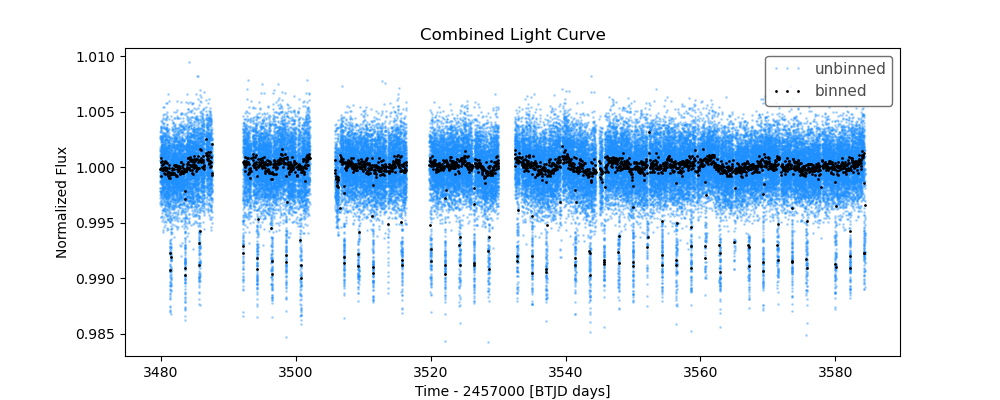

In [10]:
fig, ax = plt.subplots(figsize = (10,4))
lc_collection_stitched.plot(ax = ax, linewidth = 0, marker = '.', color = 'dodgerblue', alpha = .3, label = 'unbinned')
lc_collection_stitched_binned.plot(ax = ax, linewidth = 0, marker = '.', color = 'black', label = 'binned')
plt.title("Combined Light Curve")
plt.show()

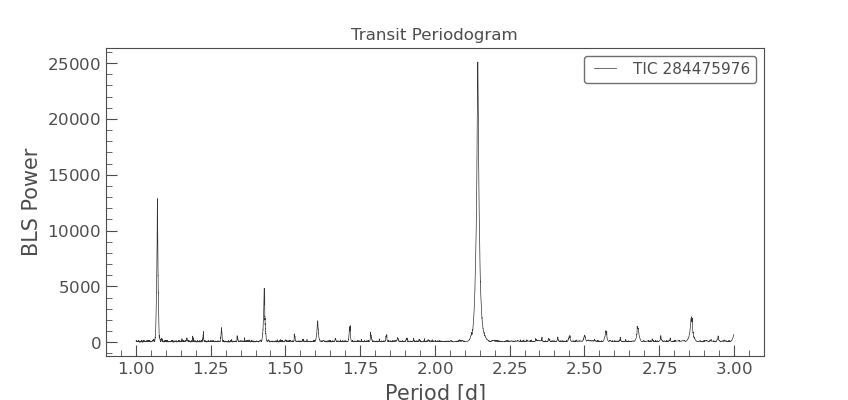

Oribtal Period: 2.1437034106275594 d
Center Time: 3481.4104525799958


In [11]:
periodogram = lc_collection_stitched_binned.to_periodogram(method = "bls", minimum_period = 1, maximum_period = 3)
period = periodogram.period_at_max_power
t0 = periodogram.transit_time_at_max_power

periodogram.plot()
plt.title("Transit Periodogram")
plt.show()
print("Oribtal Period:", period)
print("Center Time:", t0)

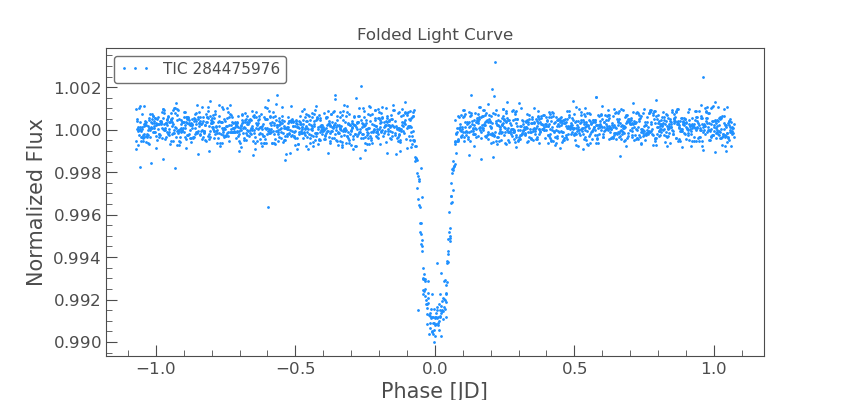

In [12]:
lc_collection_stitched_binned_phased = lc_collection_stitched_binned.fold(period = period, epoch_time = t0)

lc_collection_stitched_binned_phased.plot(linewidth = 0, marker = '.', color = 'dodgerblue')
plt.title("Folded Light Curve")
plt.show()

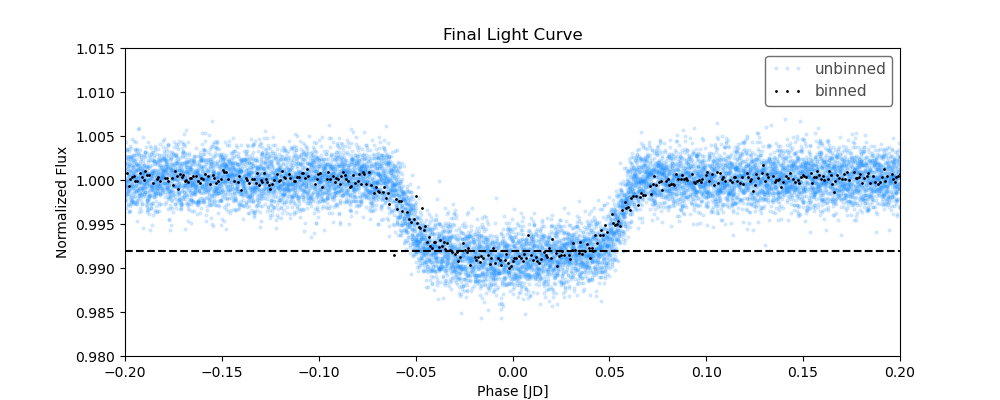

Transit depth: 0.008064872042385745


In [13]:
lc_collection_stitched_phased = lc_collection_stitched.fold(period = period, epoch_time = t0)
depth = periodogram.depth_at_max_power #estimated .00925
fig, ax = plt.subplots(figsize = (10,4))

lc_collection_stitched_phased.plot(ax = ax, linewidth = 0, marker = 'o', color = 'dodgerblue', alpha = .15, label = 'unbinned')
lc_collection_stitched_binned_phased.plot(ax = ax, linewidth = 0, marker = '.', color = 'black', label = 'binned')
plt.title("Final Light Curve")
plt.axhline(1-depth, color = 'black', linestyle = '--')
plt.xlim(-.2,.2)
plt.ylim(.98,1.015)
plt.show()

print("Transit depth:", depth)

In [14]:
R_star = star_mass * u.Rsun
r_pl_solar_radius = np.sqrt(depth) * R_star
r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth)
r_pl_jupiter_radius = r_pl_solar_radius.to(u.Rjupiter)

print('Radius:')
print(r_pl_earth_radius)
print(r_pl_jupiter_radius)

Radius:
17.3441225120582 earthRad
1.5473416297509988 jupiterRad


### False Positive - Test 1

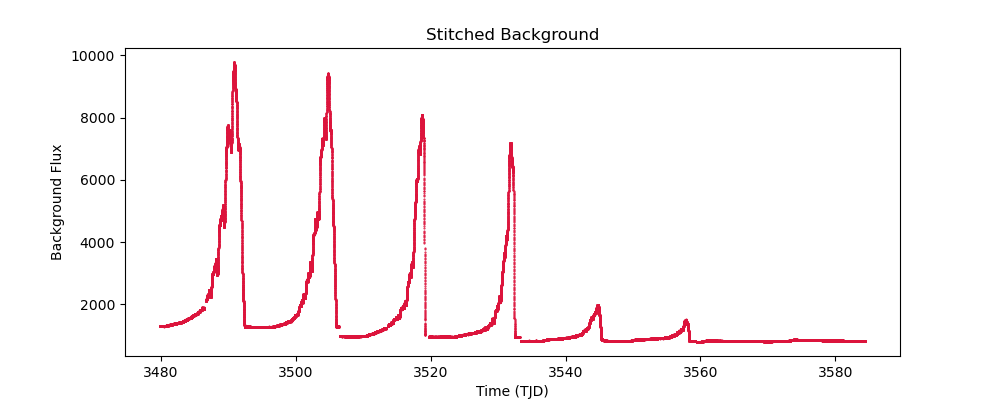

In [15]:
fig, ax = plt.subplots(figsize = (10,4))

plt.plot(lc_collection_stitched.time.value, lc_collection_stitched.sap_bkg.value, color = 'crimson', lw = 0, marker = '.', ms =1)
plt.title("Stitched Background")
plt.ylabel("Background Flux")
plt.xlabel("Time (TJD)")
plt.show()

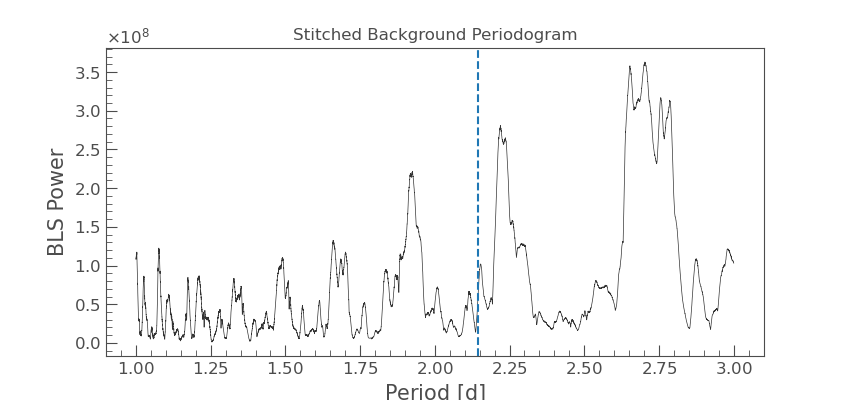

Period: 2.702738488229826 d


In [16]:
background = LightCurve(time = lc_collection_stitched.time, flux = lc_collection_stitched.sap_bkg)
periodogram_bkg = background.to_periodogram(method = "bls", minimum_period = 1, maximum_period = 3)
period_bkg = periodogram_bkg.period_at_max_power

periodogram_bkg.plot()
plt.axvline(period.value, linestyle = '--')
plt.title("Stitched Background Periodogram")
plt.show()
print("Period:", period_bkg)

Since background flux period does not correlate with transit orbital period and spikes seem to match gaps between stitched light curves, this could be the cause of the nonsmooth flux variation. Test with single light curve and narrow plot around transit time.

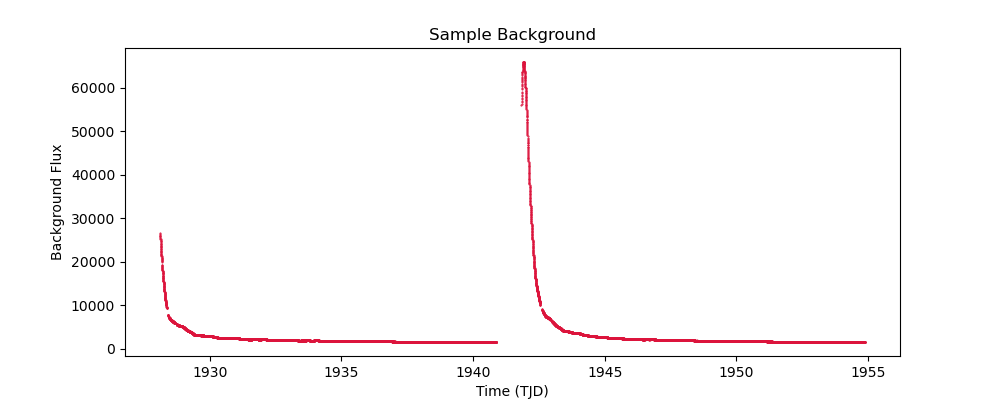

In [17]:
fig, ax = plt.subplots(figsize = (10,4))

plt.plot(lc.time.value, lc.sap_bkg.value, color = 'crimson', lw = 0, marker = '.', ms = 1)
plt.title("Sample Background")
plt.ylabel("Background Flux")
plt.xlabel("Time (TJD)")
plt.show()

This graph seems to support hypothesis since spike is inline with gap in light curve within single sample light curve. The rest of the plot is relatively smooth as expected.

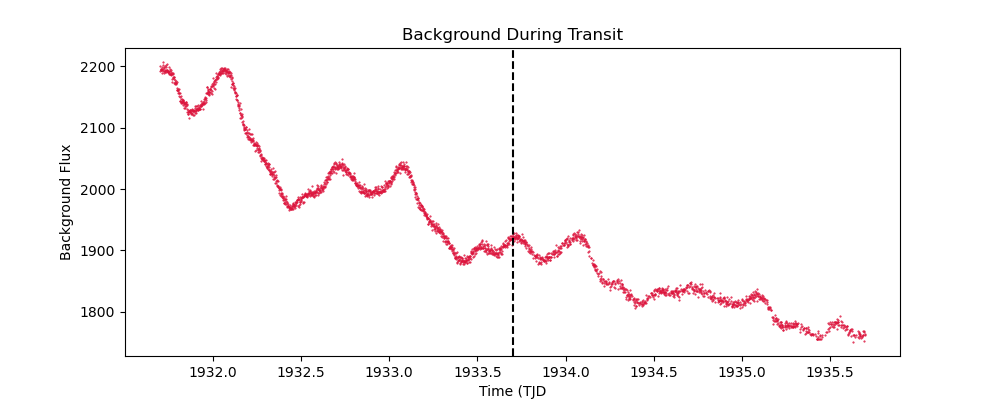

In [18]:
transit_time = 1933.7 #1948.7
transit_mask = (lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2)
fig, ax = plt.subplots(figsize= (10,4))

plt.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'crimson', lw = 0, marker = '.', ms = 1)
plt.axvline(transit_time, color = 'black', linestyle = '--')
plt.title("Background During Transit")
plt.xlabel("Time (TJD")
plt.ylabel("Background Flux")
plt.show()

While background flux is not as optimally smooth, the background flux actually seems to increase as the time of transit. This background variation could be due to the background star's (1SWASP J192403.81+552734.5 -- Eclipsing Binary) fluxuating brightness as opposed to a foreground obstruction.

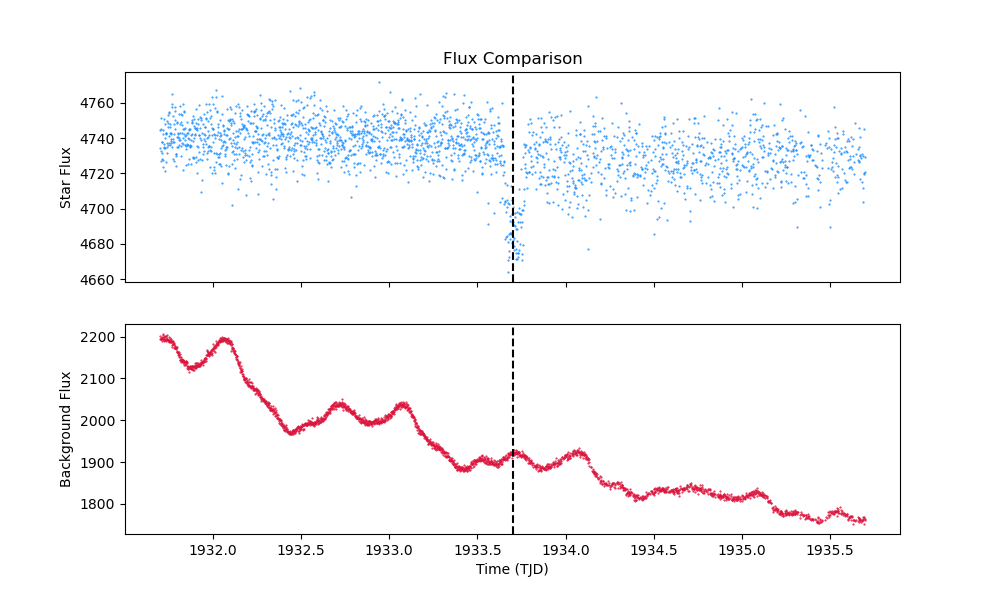

In [19]:
fig, ax = plt.subplots(2,1, sharex = True, figsize = (10,6))

ax[0].plot(lc.time.value[transit_mask], lc.sap_flux.value[transit_mask], color = 'dodgerblue', lw = 0, marker = '.', ms = 1)
ax[1].plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color = 'crimson', lw = 0, marker = '.', ms = 1)

ax[0].axvline(transit_time, color = 'black', linestyle = '--')
ax[1].axvline(transit_time, color = 'black', linestyle = '--')

ax[0].set_title("Flux Comparison")
ax[0].set_ylabel("Star Flux")
ax[1].set_ylabel("Background Flux")
ax[1].set_xlabel("Time (TJD)")

plt.show()

### Box Least Squares